### Neural Network (NN) training for numerical derivative calculation using polynomial and trigonometric functions

The objective is to train the NN to calculate the numerical derivates. For that, the code started by making sure that were only polynomals with four and five degrees. The polynomials roots was also fixed to have only even and not even degrees in order to be consistent to the paratity of the polynomials.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
def generate_polynomials_with_parity(x, degree, num_polynomials):
    y = []
    dy = []
    
    for _ in range(num_polynomials):
        # Ensure the number of roots is consistent with the parity of the degree
        if degree % 2 == 0:  # Even degree
            num_roots = degree
        else:  # Odd degree
            num_roots = degree - 1
        
        # Generate random roots in the interval of [0, 1]
        roots = np.random.uniform(0, 1, num_roots // 2)
        roots = list(roots) + list(-roots)
        if degree % 2 != 0:
            roots += [0]
        
        # Construct the polynomial coefficients from the roots
        coeffs = np.poly(roots)
        
        # Generate the polynomial and its derivative
        polinomio = np.polyval(coeffs, x)
        derivada = np.polyval(np.polyder(coeffs), x)
        
        # Normalize the polynomial and its derivative
        max_poly = np.max(np.abs(polinomio)) + 1e-8  
        max_deriv = np.max(np.abs(derivada)) + 1e-8  
        
        y.append(polinomio / max_poly)
        dy.append(derivada / max_deriv)
    
    # Stack the results into arrays
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# Applying the interval of x and the number of polynomials
x = np.linspace(-0.5, 0.5, 50).reshape(-1, 1) 
num_polynomials = 1000

y_degree_4, dy_degree_4 = generate_polynomials_with_parity(x, degree=4, num_polynomials=num_polynomials // 2)
y_degree_5, dy_degree_5 = generate_polynomials_with_parity(x, degree=5, num_polynomials=num_polynomials // 2)

# Combine the results from both degrees
y = np.vstack((y_degree_4, y_degree_5))
dy = np.vstack((dy_degree_4, dy_degree_5))

print(y.shape)
print(dy.shape)

(1000, 50)
(1000, 50)


In [15]:
num_examples = 500
x = np.linspace(-0.5, 0.5, 50)  

# Sin
y_sin = np.sin(2 * np.pi * x)
dy_sin = 2 * np.pi * np.cos(2 * np.pi * x)
y_sin = np.tile(y_sin, (num_examples, 1))      
dy_sin = np.tile(dy_sin, (num_examples, 1))    

# Cos
y_cos = np.cos(2 * np.pi * x)
dy_cos = -2 * np.pi * np.sin(2 * np.pi * x)
y_cos = np.tile(y_cos, (num_examples, 1))
dy_cos = np.tile(dy_cos, (num_examples, 1))

# Tan
y_tan = np.tan(2 * np.pi * x)
dy_tan = 2 * np.pi / np.cos(2 * np.pi * x)**2
y_tan = np.tile(y_tan, (num_examples, 1))
dy_tan = np.tile(dy_tan, (num_examples, 1))

# Sinc
y_sinc = np.sinc(x)
dy_sinc = (np.cos(np.pi * x) - np.sinc(x)) * np.pi
y_sinc = np.tile(y_sinc, (num_examples, 1))
dy_sinc = np.tile(dy_sinc, (num_examples, 1))

# Gaussian
y_gauss = np.exp(-x**2)
dy_gauss = -2 * x * np.exp(-x**2)
y_gauss = np.tile(y_gauss, (num_examples, 1))
dy_gauss = np.tile(dy_gauss, (num_examples, 1))

In [16]:
def normalize(arr):
    max_abs = np.max(np.abs(arr), axis=1, keepdims=True) + 1e-8
    return arr / max_abs

y_sin = normalize(y_sin)
dy_sin = normalize(dy_sin)
y_cos = normalize(y_cos)
dy_cos = normalize(dy_cos)
y_tan = normalize(y_tan)
dy_tan = normalize(dy_tan)
y_sinc = normalize(y_sinc)
dy_sinc = normalize(dy_sinc)
y_gauss = normalize(y_gauss)
dy_gauss = normalize(dy_gauss)

In [17]:
y = np.vstack((y_degree_4, y_degree_5, y_sin, y_cos, y_tan, y_sinc, y_gauss))
dy = np.vstack((dy_degree_4, dy_degree_5, dy_sin, dy_cos, dy_tan, dy_sinc, dy_gauss))
print(y.shape)  
print(dy.shape) 

(3500, 50)
(3500, 50)


One can vary the number of neurons, layers, and other parameters of the MLPRegressor. The training data size chosen was 80% of the dataset. It is worth highlighting that the number of layers should not be too large; otherwise, the model may overfit.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 20  
layers = 3   

model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=20000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.0005,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Iteration 1, loss = 0.22758328
Iteration 2, loss = 0.18606832
Iteration 3, loss = 0.15870202
Iteration 4, loss = 0.14010370
Iteration 5, loss = 0.12499272
Iteration 6, loss = 0.11186874
Iteration 7, loss = 0.10026725
Iteration 8, loss = 0.09019258
Iteration 9, loss = 0.08167831
Iteration 10, loss = 0.07456791
Iteration 11, loss = 0.06881342
Iteration 12, loss = 0.06429057
Iteration 13, loss = 0.06030717
Iteration 14, loss = 0.05723826
Iteration 15, loss = 0.05478417
Iteration 16, loss = 0.05275372
Iteration 17, loss = 0.05102007
Iteration 18, loss = 0.04955020
Iteration 19, loss = 0.04839983
Iteration 20, loss = 0.04729085
Iteration 21, loss = 0.04633658
Iteration 22, loss = 0.04561837
Iteration 23, loss = 0.04484236
Iteration 24, loss = 0.04417943
Iteration 25, loss = 0.04347788
Iteration 26, loss = 0.04294384
Iteration 27, loss = 0.04247143
Iteration 28, loss = 0.04197566
Iteration 29, loss = 0.04154352
Iteration 30, loss = 0.04116275
Iteration 31, loss = 0.04083629
Iteration 32, los

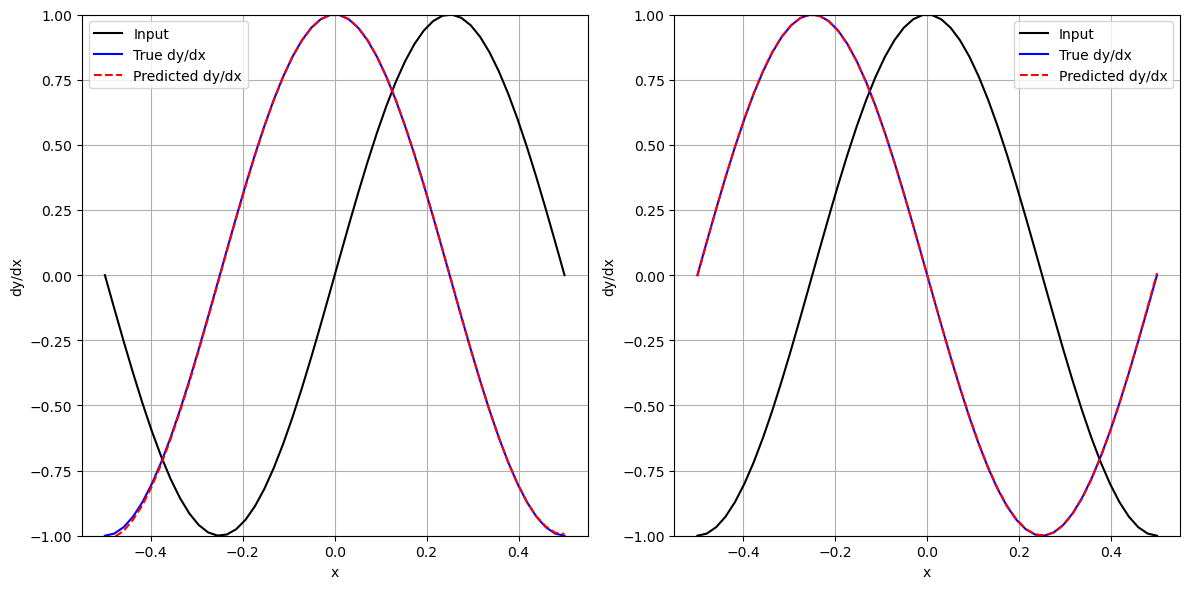

In [21]:
new_x = np.linspace(-0.5, 0.5, y.shape[1]).reshape(-1, 1)  
new_y = np.sin(2 * np.pi * new_x).T  
new_dy = np.cos(2 * np.pi * new_x).T  

# Teste 1
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# Teste 2
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
new_y = np.cos(2 * np.pi * new_x).T
new_dy = -np.sin(2 * np.pi * new_x).T
predicted_derivative = model.predict(new_y)

plt.plot(new_x, new_y[0], label='Input', color='black')
plt.plot(new_x, new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x, predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
